In [2]:
# Done with Alexandra Nagy

In [3]:
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

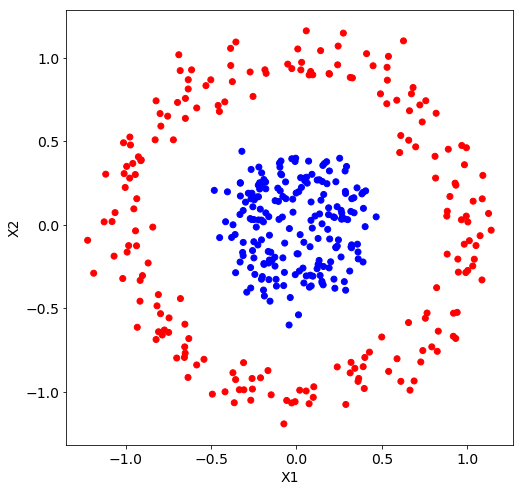

In [4]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

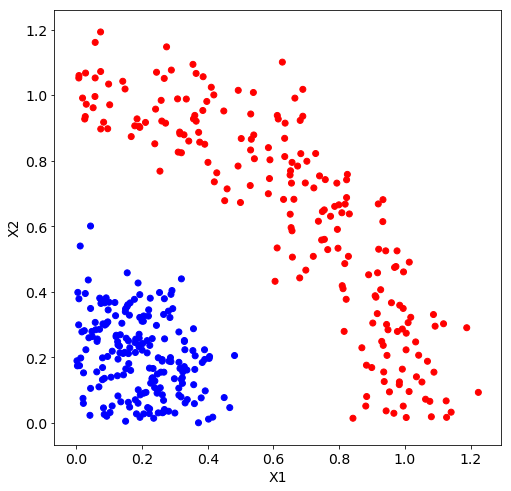

In [21]:
# First, I'll fold the data to the Ist quadrant, using the obvious symmetry.
from numpy import loadtxt, where, zeros, e, array, log, ones, append, linspace
from pylab import scatter, show, legend, xlabel, ylabel, contour, title
from scipy.optimize import fmin_bfgs

m,n = X.shape
Xp = np.copy(X)
for ii in range (m):
    for jj in range (n):
        if X[ii][jj]<0:
            Xp[ii][jj] = - X[ii][jj]
            
plt.scatter(Xp[:,0], Xp[:,1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Coefficients: 
 1) 2.0509
 2) 1.6777


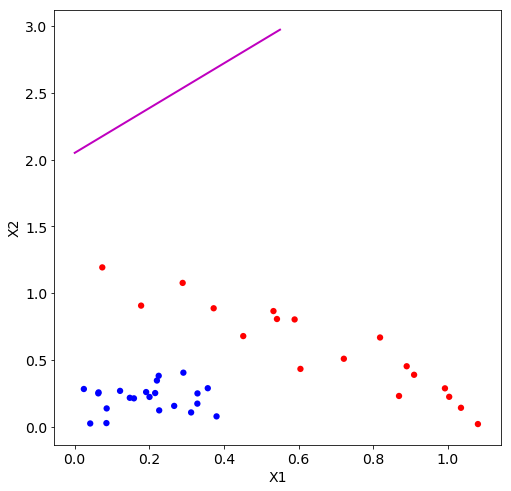

In [22]:
# I perform the LogisticRegression on top of this configuration
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xp, y, train_size = 0.1)
lgc = LogisticRegression()
lgc.fit(X_train,y_train)
print("Coefficients: ")
print(" 1) %.4f" % lgc.coef_[0][0])
print(" 2) %.4f" % lgc.coef_[0][1])
#Seriously...?!

def f(x,a,b):
    return a+b*x

x_plt = np.arange(0,0.6,0.05)
a = lgc.coef_[0][0]
b = lgc.coef_[0][1]
pred = f(x_plt,a,b)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, lw=0, s=40)
plt.plot(x_plt,pred,c='m',lw=2)
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

#xx, yy = np.mgrid[0:1.1:.005, 0:1.1:.005]
#grid = np.c_[xx.ravel(), yy.ravel()]
#probs = lgc.predict_proba(grid)[:, 1].reshape(xx.shape)
#f, ax = plt.subplots(figsize=(8, 6))
#contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
#                      vmin=0, vmax=1)
#ax_c = f.colorbar(contour)
#ax_c.set_label("$P(y = 1)$")

#ax.scatter(Xp[:,0], Xp[:, 1], c=y, s=50,
#           cmap="RdBu", vmin=-.2, vmax=1.2,
#           edgecolor="white", linewidth=1)
#
#ax.set(aspect="equal",
#       xlim=(0, 1.1), ylim=(0, 1.1),
#       xlabel="$X_1$", ylabel="$X_2$")
#
#plt.show()

In [28]:
# Obviously, this doesn't work. Let's try to use another method....
# Looks like to improve the complexity of the system, we should create 
# new datasets on the basis of the two original ones by considering 
# products of them : x, xy, xy2, xy3, etc..

In [24]:
def map_feature(x1, x2):
    '''
    Maps the two input features to quadratic features.
    Returns a new feature array with more features, comprising of
    X1, X2, X1 ** 2, X2 ** 2, X1*X2, X1*X2 ** 2, etc...
    Inputs X1, X2 must be the same size
    '''
    x1.shape = (x1.size, 1)
    x2.shape = (x2.size, 1)
    degree = 3
    out = ones(shape=(x1[:, 0].size, 1))

    m, n = out.shape

    for i in range(1, degree + 1):
        for j in range(i + 1):
            r = (x1 ** (i - j)) * (x2 ** j)
            out = append(out, r, axis=1)
    return out


In [29]:
# Then, we have use another classifier. We first have to define it.